# FAANG's Stock Market Performance
By Alvaro Rodriguez

## Business Understanding

## Data Understanding

## Data Preparation

Stock market performance analysis includes calulating close stock prices, moving averages, and measuring volatility

In [24]:
!pip install yfinance

### Collect Real-Time Stock Market Data
Using the yfinance API, the data can be collected straight from Yahoo finance.

In [25]:
import pandas as pd
import yfinance as yf
from datetime import datetime

In [26]:
# Start date of the stock price 12 months ago to current date
start_date = datetime.now() - pd.DateOffset(months=12)
end_date = datetime.now()

In [27]:
# Download the historical stock price data for FAANG for the last year
tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                         Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2022-05-19  191.199997  195.289993  189.600006  191.289993  191.289993  \
       2022-05-20  194.970001  197.910004  187.869995  193.539993  193.539993   
       2022-05-23  195.190002  196.990005  191.240005  196.229996  196.229996   
       2022-05-24  180.550003  183.679993  176.110001  181.279999  181.279999   
       2022-05-25  180.399994  185.449997  179.320007  183.830002  183.830002   

                     Volume  
Ticker Date                  
META   2022-05-19  24446900

### Dataframe Information

In [28]:
df

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2022-05-19  191.199997  195.289993  189.600006  191.289993  191.289993  \
       2022-05-20  194.970001  197.910004  187.869995  193.539993  193.539993   
       2022-05-23  195.190002  196.990005  191.240005  196.229996  196.229996   
       2022-05-24  180.550003  183.679993  176.110001  181.279999  181.279999   
       2022-05-25  180.399994  185.449997  179.320007  183.830002  183.830002   
...                       ...         ...         ...         ...         ...   
GOOG   2023-05-12  117.000000  118.260002  116.550003  117.919998  117.919998   
       2023-05-15  116.489998  118.794998  116.480003  116.959999  116.959999   
       2023-05-16  116.830002  121.199997  116.830002  120.089996  120.089996   
       2023-05-17  120.180000  122.279999  119.459999  121.480003  121.480003   
       2023-05-18  121.559998  123.900002  121.489998  123.519997  123.519997   

                     Volume  
Ticker Date                  
META   2022-05-19  24446900  
       2022-05-20  31465600  
       2022-05-23  25059200  
       2022-05-24  50406300  
       2022-05-25  28030200  
...                     ...  
GOOG   2023-05-12  31272500  
       2023-05-15  22107900  
       2023-05-16  32370100  
       2023-05-17  26659600  
       2023-05-18  26961100  

[1255 rows x 6 columns]

In [29]:
df.head()

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2022-05-19  191.199997  195.289993  189.600006  191.289993  191.289993  \
       2022-05-20  194.970001  197.910004  187.869995  193.539993  193.539993   
       2022-05-23  195.190002  196.990005  191.240005  196.229996  196.229996   
       2022-05-24  180.550003  183.679993  176.110001  181.279999  181.279999   
       2022-05-25  180.399994  185.449997  179.320007  183.830002  183.830002   

                     Volume  
Ticker Date                  
META   2022-05-19  24446900  
       2022-05-20  31465600  
       2022-05-23  25059200  
       2022-05-24  50406300  
       2022-05-25  28030200

In [30]:
df.tail()

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
GOOG   2023-05-12  117.000000  118.260002  116.550003  117.919998  117.919998  \
       2023-05-15  116.489998  118.794998  116.480003  116.959999  116.959999   
       2023-05-16  116.830002  121.199997  116.830002  120.089996  120.089996   
       2023-05-17  120.180000  122.279999  119.459999  121.480003  121.480003   
       2023-05-18  121.559998  123.900002  121.489998  123.519997  123.519997   

                     Volume  
Ticker Date                  
GOOG   2023-05-12  31272500  
       2023-05-15  22107900  
       2023-05-16  32370100  
       2023-05-17  26659600  
       2023-05-18  26961100

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1255 entries, ('META', Timestamp('2022-05-19 00:00:00')) to ('GOOG', Timestamp('2023-05-18 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1255 non-null   float64
 1   High       1255 non-null   float64
 2   Low        1255 non-null   float64
 3   Close      1255 non-null   float64
 4   Adj Close  1255 non-null   float64
 5   Volume     1255 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 72.9+ KB


In [32]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,159.469356,162.293560,157.108804,159.836685,159.731730,4.332125e+07
std,69.344797,70.695074,68.197933,69.565167,69.580901,3.212326e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.657900e+06
25%,107.410000,109.184250,105.610001,107.630501,107.630501,1.945955e+07
50%,140.580002,142.899994,138.339996,140.800003,140.639999,3.335400e+07
75%,179.200005,183.639999,175.995003,180.029999,180.029999,6.467485e+07
max,372.410004,379.429993,361.739990,371.290009,371.290009,2.323166e+08


In [33]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [34]:
df.index

MultiIndex([('META', '2022-05-19'),
            ('META', '2022-05-20'),
            ('META', '2022-05-23'),
            ('META', '2022-05-24'),
            ('META', '2022-05-25'),
            ('META', '2022-05-26'),
            ('META', '2022-05-27'),
            ('META', '2022-05-31'),
            ('META', '2022-06-01'),
            ('META', '2022-06-02'),
            ...
            ('GOOG', '2023-05-05'),
            ('GOOG', '2023-05-08'),
            ('GOOG', '2023-05-09'),
            ('GOOG', '2023-05-10'),
            ('GOOG', '2023-05-11'),
            ('GOOG', '2023-05-12'),
            ('GOOG', '2023-05-15'),
            ('GOOG', '2023-05-16'),
            ('GOOG', '2023-05-17'),
            ('GOOG', '2023-05-18')],
           names=['Ticker', 'Date'], length=1255)

In [35]:
df.shape

(1255, 6)

In [36]:
# Date column is in the index column in the DataFrame
df = df.reset_index()
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,META,2022-05-19,191.199997,195.289993,189.600006,191.289993,191.289993,24446900
1,META,2022-05-20,194.970001,197.910004,187.869995,193.539993,193.539993,31465600
2,META,2022-05-23,195.190002,196.990005,191.240005,196.229996,196.229996,25059200
3,META,2022-05-24,180.550003,183.679993,176.110001,181.279999,181.279999,50406300
4,META,2022-05-25,180.399994,185.449997,179.320007,183.830002,183.830002,28030200
...,...,...,...,...,...,...,...,...
1250,GOOG,2023-05-12,117.000000,118.260002,116.550003,117.919998,117.919998,31272500
1251,GOOG,2023-05-15,116.489998,118.794998,116.480003,116.959999,116.959999,22107900
1252,GOOG,2023-05-16,116.830002,121.199997,116.830002,120.089996,120.089996,32370100
1253,GOOG,2023-05-17,120.180000,122.279999,119.459999,121.480003,121.480003,26659600


### Plot Stock Market Performance

In [37]:
# Performance in the Stock Market of all the companies
import plotly.express as px
fig = px.line(df, x='Date',
             y='Close',
             color='Ticker',
             title="Stock Market Performance of FANNG for the Last Year")
fig.show();

In [38]:
# Faceted area chart of the companies to compare the performance of different companies
fig = px.area(df, x='Date', y='Close', color='Ticker',
             facet_col='Ticker',
             labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
             title='Stock Prices for FAANG')

fig.show();

### Analyze Moving Averages

In [39]:
# Analyze moving averages; provides a useful way to identify trends and patterns in each company's stock price movements over the year

df['MA10'] = df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA20'] = df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
           MA10        MA20
251         NaN         NaN
252         NaN         NaN
253         NaN         NaN
254         NaN         NaN
255         NaN         NaN
..          ...         ...
497  171.009000  168.602000
498  171.257001  168.944000
499  171.610002  169.224001
500  172.134003  169.477000
501  173.060004  169.897001

[251 rows x 2 columns]
Moving Averages for AMZN
           MA10        MA20
502         NaN         NaN
503         NaN         NaN
504         NaN         NaN
505         NaN         NaN
506         NaN         NaN
..          ...         ...
748  106.407001  105.660501
749  107.322001  106.083501
750  108.299001  106.638501
751  109.484001  107.198500
752  110.899001  107.915501

[251 rows x 2 columns]
Moving Averages for GOOG
            MA10       MA20
1004         NaN        NaN
1005         NaN        NaN
1006         NaN        NaN
1007         NaN        NaN
1008         NaN        NaN
...          ...        ...
1250  109

In [40]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20'], 
                  title=f"{ticker} Moving Averages")
    fig.show()

The output shows four separate graphs for each company in FAANG. When the MA10 crosses above the MA20, it is considered a bullish signal.
When the MA10 rosses below the MA20, it is considered a bearish signal.

### Analyze Volatility of Each Company in FAANG

In [41]:
# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility', 
              color='Ticker', 
              title='Volatility of All Companies')
fig.show()

Volatility is the measure of how much and how often the stock price fluctuates over a given period of time. High volatility indicates that the stock experiences large and frequent price movements, while low volatility indicates that the market experiences smaller price movements.

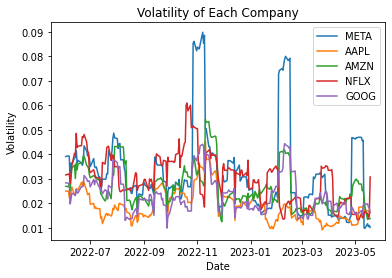

In [42]:
import matplotlib.pyplot as plt

# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Iterate over each company
for ticker in df['Ticker'].unique():
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()  # Convert to NumPy array
    dates = company_df['Date'].to_numpy()  # Convert 'Date' column to NumPy array
    plt.plot(dates, volatility_values, label=ticker)

plt.title('Volatility of Each Company')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show();

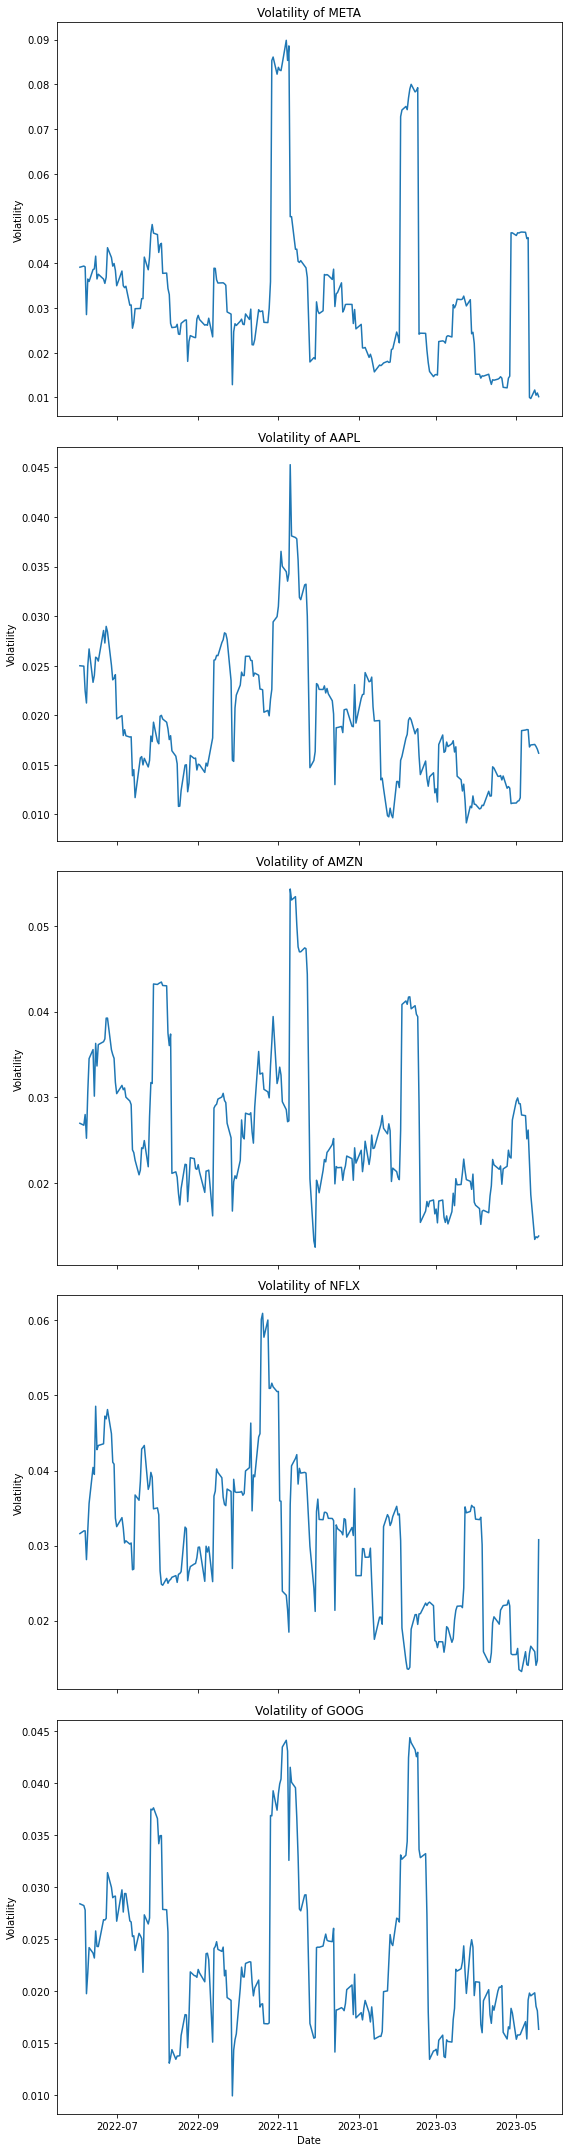

In [43]:
# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Get unique tickers
tickers = df['Ticker'].unique()

# Determine the number of subplots based on the number of tickers
num_subplots = len(tickers)

# Create subplots
fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 6*num_subplots), sharex=True)

# Iterate over each ticker and plot
for i, ticker in enumerate(tickers):
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()
    dates = company_df['Date'].to_numpy()
    
    # Select the appropriate subplot
    ax = axs[i] if num_subplots > 1 else axs
    
    # Plot the data
    ax.plot(dates, volatility_values)
    ax.set_title(f'Volatility of {ticker}')
    ax.set_ylabel('Volatility')

# Set the common x-axis label
axs[-1].set_xlabel('Date')

plt.tight_layout()
plt.show();

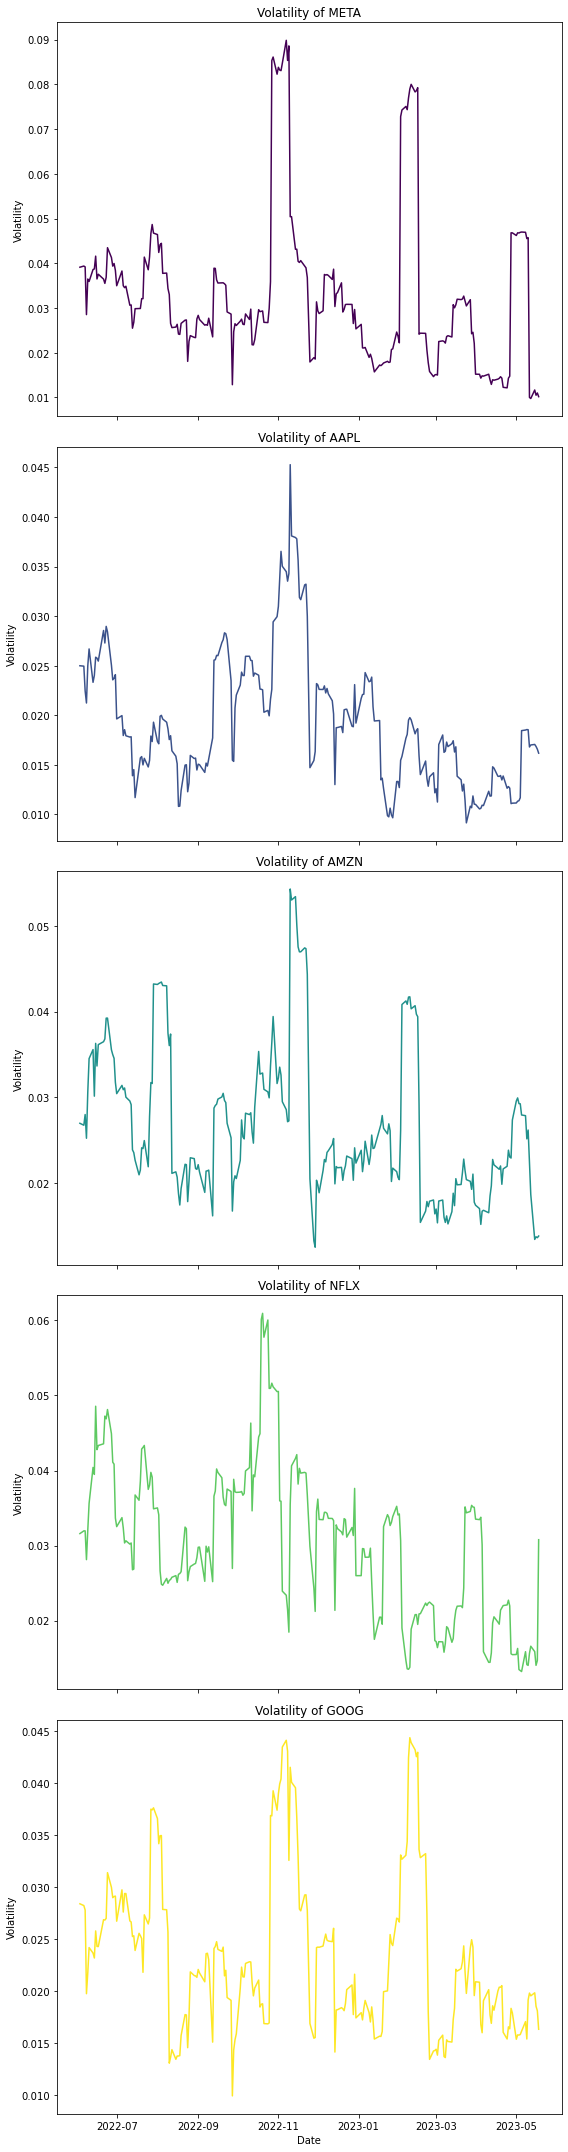

In [45]:
import numpy as np

# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Get unique tickers
tickers = df['Ticker'].unique()

# Determine the number of subplots based on the number of tickers
num_subplots = len(tickers)

# Create a colormap using the 'viridis' color map
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, num_subplots))

# Create subplots
fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 6*num_subplots), sharex=True)

# Iterate over each ticker and plot
for i, ticker in enumerate(tickers):
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()
    dates = company_df['Date'].to_numpy()
    
    # Select the appropriate subplot
    ax = axs[i] if num_subplots > 1 else axs
    
    # Plot the data with the corresponding color
    ax.plot(dates, volatility_values, color=colors[i])
    ax.set_title(f'Volatility of {ticker}')
    ax.set_ylabel('Volatility')

# Set the common x-axis label
axs[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

## Simple Model

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ticker      1255 non-null   object        
 1   Date        1255 non-null   datetime64[ns]
 2   Open        1255 non-null   float64       
 3   High        1255 non-null   float64       
 4   Low         1255 non-null   float64       
 5   Close       1255 non-null   float64       
 6   Adj Close   1255 non-null   float64       
 7   Volume      1255 non-null   int64         
 8   MA10        1210 non-null   float64       
 9   MA20        1160 non-null   float64       
 10  Volatility  1205 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 108.0+ KB


In [48]:
df.set_index('Date', inplace=True)

In [49]:
fig = px.line(df, x=df.index, y='Close', color='Ticker', title='Stock Prices Over Time')
fig.show();

### Time-Series Line Plot

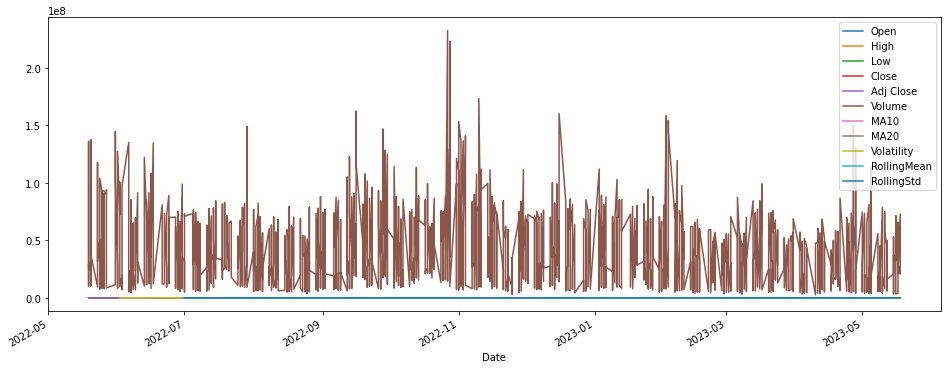

In [51]:
# Draw a line plot using df and .plot() method 
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(figsize = (16,6));

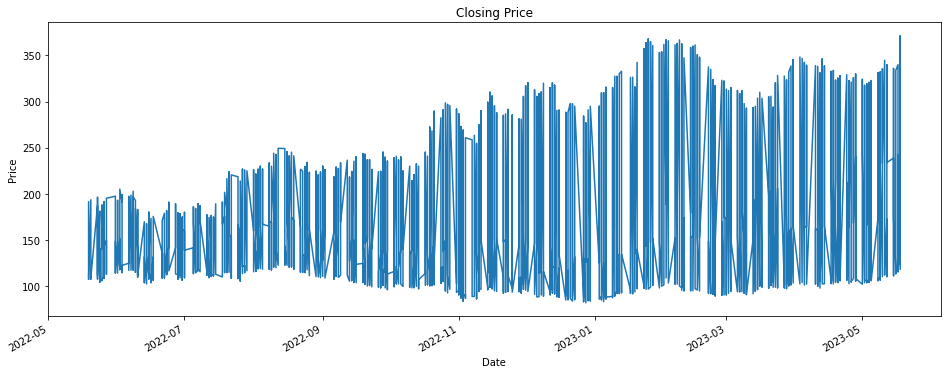

In [53]:
df['Close'].plot(figsize=(16, 6))
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

### Time-series Dot Plot

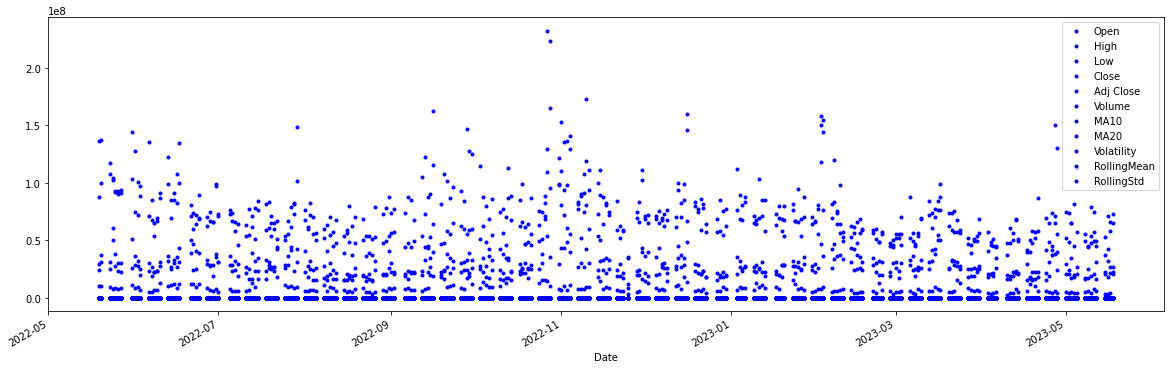

In [52]:
# Draw a dot plot using temp and .plot() method 
df.plot(figsize = (20,6), style = '.b');

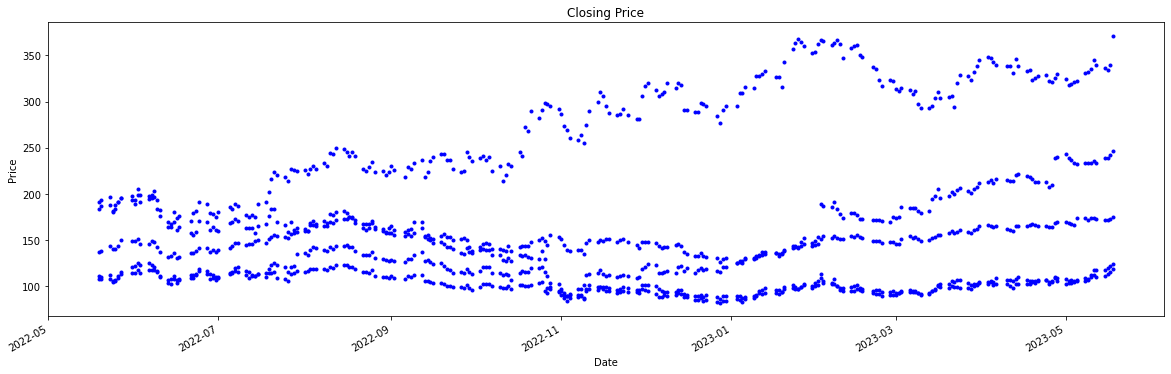

In [54]:
df['Close'].plot(figsize=(20, 6), style= '.b')
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

### Separated Annual Yearly Percentage Change

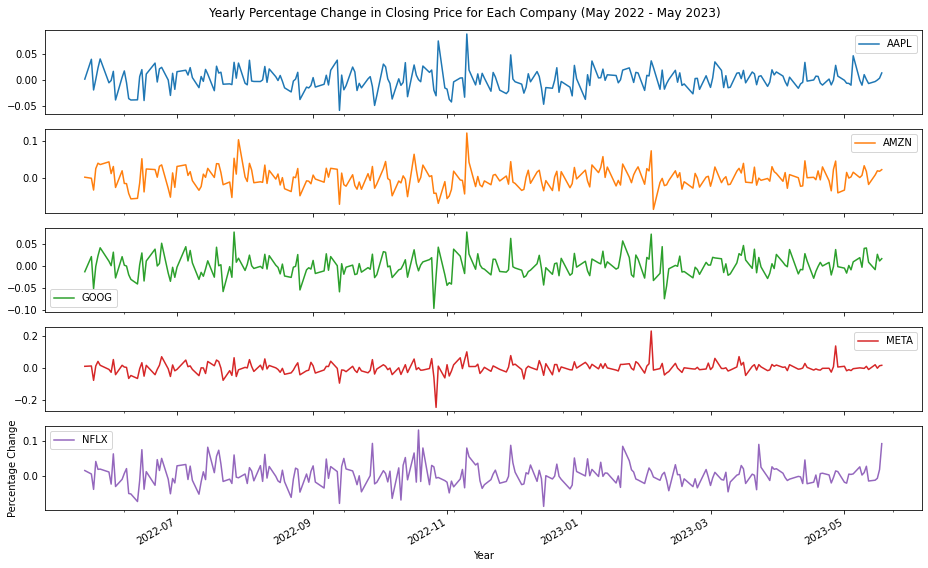

In [66]:
import pandas as pd

# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index.get_level_values('Date') >= start_date) & (df.index.get_level_values('Date') <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Create a new DataFrame to store the annual percentage changes for each company
df_annual_pct_change = pd.DataFrame()

# Iterate over each group
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index.get_level_values('Date'))
    # Store the annual percentage changes in the new DataFrame
    df_annual_pct_change[ticker] = pct_change

# Plot the annual percentage changes as subplots
df_annual_pct_change.plot(figsize=(13, 8), subplots=True, legend=True)

# Set the plot title and labels
plt.suptitle('Yearly Percentage Change in Closing Price for Each Company (May 2022 - May 2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show();

In [67]:
df_annual

,AAPL_2022,AAPL_2023,AMZN_2022,AMZN_2023,GOOG_2022,GOOG_2023,META_2022,META_2023,NFLX_2022,NFLX_2023
Date,,,,,,,,,,
2022-05-19,137.350006,NaN,107.319000,NaN,110.745499,NaN,191.289993,NaN,183.479996,NaN
2022-05-20,137.589996,NaN,107.591003,NaN,109.313004,NaN,193.539993,NaN,186.350006,NaN
2022-05-23,143.110001,NaN,107.556999,NaN,111.666496,NaN,196.229996,NaN,187.440002,NaN
2022-05-24,140.360001,NaN,104.099998,NaN,105.926003,NaN,181.279999,NaN,180.339996,NaN
2022-05-25,140.520004,NaN,106.775002,NaN,105.839500,NaN,183.830002,NaN,187.830002,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,NaN,85.250000,NaN,89.809998,NaN,118.040001,NaN,294.959991,NaN
2022-12-27,130.029999,NaN,83.040001,NaN,87.930000,NaN,116.879997,NaN,284.170013,NaN
2022-12-28,126.040001,NaN,81.820000,NaN,86.459999,NaN,115.620003,NaN,276.880005,NaN


### All Annual Together

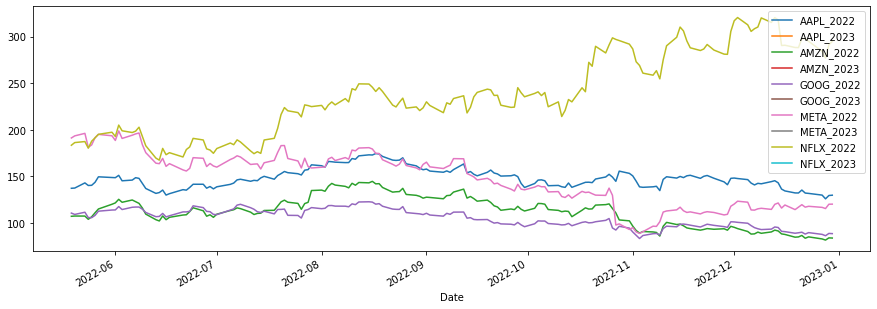

In [68]:
# Plot overlapping yearly groups 
df_annual.plot(figsize=(15, 5), subplots=False, legend=True)
plt.show()

## Model

## Evaluation

## Results

## Conclusion

## Next Steps